# The Impact of Money and Environment on Education

## Research Questions

**1. What Role Does Income Play in Test Scores?**  
I'll be observing the different SAT test scores among different income levels.

**2. What Are The Impacts of School Expenditures?**  
I'll be observing how school expenditures impact test scores and GPA's.

**3. Could The Prevalence of STEM Occupations Have an Impact on Math Scores?**  
I'll be looking if there is any sort of correlation among women's test scores as well as how common STEM occupations are for women in that area. What inspired me for this question was the idea of role models and having people to look up to.

---

*By Atakan Toprakbasti*

## Challenge Goals

**1. Multiple Datasets**  
   - Used 3 datasets, each related to eachother in some way in order to answer research questions. The merge function was also used multiple times due to this.

**2. Statistical Hypothesis Testing**  
   - Conducted various statistical tests to measure correlation. The type of test was determined by the context of the situation. For this project I used both the Pearson Tests and an ANOVA Test. 

## Datasets Used

**1. https://corgis-edu.github.io/corgis/csv/school_scores/**  


**2. https://www.kaggle.com/datasets/noriuk/us-educational-finances**  


**3. https://statusofwomendata.org/explore-the-data/employment-and-earnings/additional-state-data/stem/**  


## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [1]:
your_name = "Atakan"
sources = [
    'Data Visualization - Lecture',
    'Data Frames - Lecture',
    'Dissolve, Intersect, Join - Lecture',
    'Data Settings - Lecture',
    'Which statisitical test should I use in this scenario - ChatGPT prompt',
    'How can I plot side by side - ChatGPT prompt'
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.testing import assert_series_equal
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr

sns.set_theme(style="dark")

## Data Setting and Methods

*To begin I created a clean_df() method that essentially reformats every column header to a specific style allowing me to easily access columns and ensures consistency. From then on I only loaded in the required columns as many of these datasets contained information irrelavant to my research. I also ensured that the years for the datasets remain consistent, as most of them are from 2015-2016. Every dataset is also indexed by state which allows me to easily utilize the merge function, and provides more consistency. The data is prone to bias as it is difficult to determine the accuracy of some of these datasets, and sample sizes are not that big, especially for some of the states within the school scores dataset.*

In [3]:
def clean_df(df):
    """
    Cleans the DataFrame by creating a deep copy of it, then standardizing the column names.

    The column names are standardized by stripping leading/trailing whitespace, converting to 
    uppercase, and replacing periods and spaces with underscores.

    Parameters:
        - df : pandas DataFrame
            The input DataFrame to be cleaned.

    Returns:
        - df : pandas DataFrame
            A new DataFrame with cleaned column names.
    """
    
    df = df.copy(deep=True)
    df.columns = [name.strip().upper().replace('.', '_').replace(' ', '_') for name in df.columns]
    return df

In [4]:
def process_school_scores(file_path):
    """
    Reads a CSV file containing school scores data, filters it for the year 2015,
    selects required columns, calculates average GPA, and cleans the DataFrame.

    Parameters:
        - file_path : str
            Path to the CSV file containing the school scores data.

    Returns:
        - school_scores : pandas DataFrame
            Processed DataFrame containing cleaned school scores data.
    """
    
    # Read the CSV file
    school_scores = pd.read_csv(file_path)

    # Filter out the specified year
    school_scores = school_scores[school_scores['Year'] == 2015].copy()

    # Specify the required columns
    gpa_columns = [
        'Academic Subjects.Arts/Music.Average GPA', 
        'Academic Subjects.English.Average GPA', 
        'Academic Subjects.Foreign Languages.Average GPA', 
        'Academic Subjects.Mathematics.Average GPA', 
        'Academic Subjects.Natural Sciences.Average GPA', 
        'Academic Subjects.Social Sciences/History.Average GPA'
    ]
    required_columns = [
        'State.Name', 
        'Total.Math', 
        'Total.Verbal', 
        'Total.Test-takers', 
        'Family Income.Less than 20k.Math', 
        'Family Income.Between 20-40k.Math', 
        'Family Income.Between 40-60k.Math', 
        'Family Income.Between 60-80k.Math', 
        'Family Income.Between 80-100k.Math', 
        'Family Income.More than 100k.Math',
        'Family Income.Less than 20k.Verbal', 
        'Family Income.Between 20-40k.Verbal', 
        'Family Income.Between 40-60k.Verbal', 
        'Family Income.Between 60-80k.Verbal', 
        'Family Income.Between 80-100k.Verbal', 
        'Family Income.More than 100k.Verbal',
        'Gender.Female.Math',
        'Gender.Female.Test-takers'
    ] + gpa_columns
    school_scores = school_scores[required_columns].copy()

    # Ensure GPA columns are numeric and calculate average GPA
    school_scores[gpa_columns] = school_scores[gpa_columns].apply(pd.to_numeric)
    school_scores['average_gpa'] = school_scores[gpa_columns].mean(axis=1)

    # Drop individual GPA columns
    school_scores.drop(columns=gpa_columns, inplace=True)

    # Set the index to 'State.Name' and rename the index to 'STATE'
    school_scores.set_index('State.Name', inplace=True)
    school_scores.rename_axis('STATE', inplace=True)

    # Display the DataFrame
    school_scores = clean_df(school_scores)
    return school_scores

school_scores = process_school_scores('school_scores.csv')
school_scores

,TOTAL_MATH,TOTAL_VERBAL,TOTAL_TEST-TAKERS,FAMILY_INCOME_LESS_THAN_20K_MATH,FAMILY_INCOME_BETWEEN_20-40K_MATH,FAMILY_INCOME_BETWEEN_40-60K_MATH,FAMILY_INCOME_BETWEEN_60-80K_MATH,FAMILY_INCOME_BETWEEN_80-100K_MATH,FAMILY_INCOME_MORE_THAN_100K_MATH,FAMILY_INCOME_LESS_THAN_20K_VERBAL,FAMILY_INCOME_BETWEEN_20-40K_VERBAL,FAMILY_INCOME_BETWEEN_40-60K_VERBAL,FAMILY_INCOME_BETWEEN_60-80K_VERBAL,FAMILY_INCOME_BETWEEN_80-100K_VERBAL,FAMILY_INCOME_MORE_THAN_100K_VERBAL,GENDER_FEMALE_MATH,GENDER_FEMALE_TEST-TAKERS,AVERAGE_GPA
STATE,,,,,,,,,,,,,,,,,,
Alabama,541,547,2929,441,474,507,545,531,567,459,485,517,544,547,574,514,1676,3.668333
Alaska,505,509,3799,426,468,488,506,518,533,429,478,498,511,522,537,490,2162,3.470000
Arizona,529,523,21545,469,494,512,524,538,555,465,491,510,523,534,547,510,12014,3.525000
Arkansas,572,569,1207,509,538,551,552,575,582,500,528,548,555,570,589,551,684,3.740000
California,507,496,241553,445,472,492,509,528,560,435,461,484,502,521,549,488,133217,3.406667
Colorado,588,582,6485,525,554,560,570,584,598,519,547,552,575,586,591,570,3571,3.675000
Connecticut,506,504,36445,417,459,481,499,518,552,424,462,485,501,514,545,492,18891,3.348333
Delaware,462,462,9823,404,440,468,480,502,527,402,451,467,485,501,528,453,5099,3.356667
District Of Columbia,440,441,4718,363,406,413,459,484,561,366,404,417,470,503,574,427,2388,3.250000


In [5]:
def process_school_expenditure(file_path):
    """
    Reads a CSV file containing school expenditure data, filters it for the year 2016,
    selects required columns, and cleans the DataFrame.

    Parameters:
        - file_path : str
            Path to the CSV file containing the school expenditure data.

    Returns:
        - school_expenditure : pandas DataFrame
            Processed DataFrame containing cleaned school expenditure data.
    """
    
    # Read the CSV file
    school_expenditure = pd.read_csv(file_path)

    # Filter out the specified year
    school_expenditure = school_expenditure[school_expenditure['YEAR'] == 2016].copy()

    # Specify the required columns
    required_columns = ['STATE', 'ENROLL', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE']
    school_expenditure = school_expenditure[required_columns].copy()

    # Set index to 'STATE'
    school_expenditure.set_index('STATE', inplace=True)

    # Display the DataFrame
    school_expenditure = clean_df(school_expenditure)
    return school_expenditure

school_expenditure = process_school_expenditure('states.csv')
school_expenditure

,ENROLL,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE
STATE,,,,
Alabama,734652.0,7708845,3865453,2439634
Alaska,132477.0,2623014,1251738,983877
Arizona,938274.0,7987011,3872250,2913176
Arkansas,479177.0,5434193,2658253,1802769
California,6217031.0,85320133,42587272,26058021
Colorado,880678.0,9878524,4786838,3333043
Connecticut,499494.0,10826431,6110631,3307162
Delaware,121225.0,2041952,1126775,588181
District of Columbia,48336.0,1322563,594396,369131


In [6]:
def process_women_stem(file_path):
    """
    Reads a CSV file containing data on the percentage of women in STEM occupations,
    selects required columns, renames them, cleans the DataFrame, and sets the index.

    Parameters:
        - file_path : str
            Path to the CSV file containing the women in STEM data.

    Returns:
        - women_stem : pandas DataFrame
            Processed DataFrame containing cleaned data on the percentage of women in STEM occupations.
    """
    
    # Read the CSV file
    women_stem = pd.read_csv(file_path)

    # Specify the required columns
    required_columns = [
        'State',
        'Percent of Employed Women in STEM Occupations',
        'Women’s Share of All STEM Workers'
    ]
    women_stem = women_stem[required_columns].copy()

    # Rename the columns
    women_stem.columns = ['STATE', 'PERCENT_WOMEN_STEM', 'WOMEN_SHARE_OF_STEM']

    # Set the index to 'State' and rename the index to 'STATE'
    women_stem.set_index('STATE', inplace=True)
    women_stem.sort_index(inplace=True)

    # Remove "%" sign and convert to float
    women_stem['PERCENT_WOMEN_STEM'] = women_stem['PERCENT_WOMEN_STEM'].str.replace('%', '').astype(float)
    women_stem['WOMEN_SHARE_OF_STEM'] = women_stem['WOMEN_SHARE_OF_STEM'].str.replace('%', '').astype(float)

    # Display the DataFrame
    return women_stem

women_stem = process_women_stem('womenSTEM.csv')
women_stem

,PERCENT_WOMEN_STEM,WOMEN_SHARE_OF_STEM
STATE,,
Alabama,4.0,26.5
Alaska,4.0,25.2
Arizona,4.8,27.1
Arkansas,3.4,30.0
California,5.3,28.9
Colorado,6.1,28.9
Connecticut,5.3,30.2
Delaware,5.1,29.8
District of Columbia,10.6,44.2


# RQ 1: What Role Does Income Play in Test Scores?

*For this question I first decided to graph the correlation between income and test scores. I seperated both math and verbal scores for consistency purposes. I then decided to confirm this correlation with an ANOVA test*

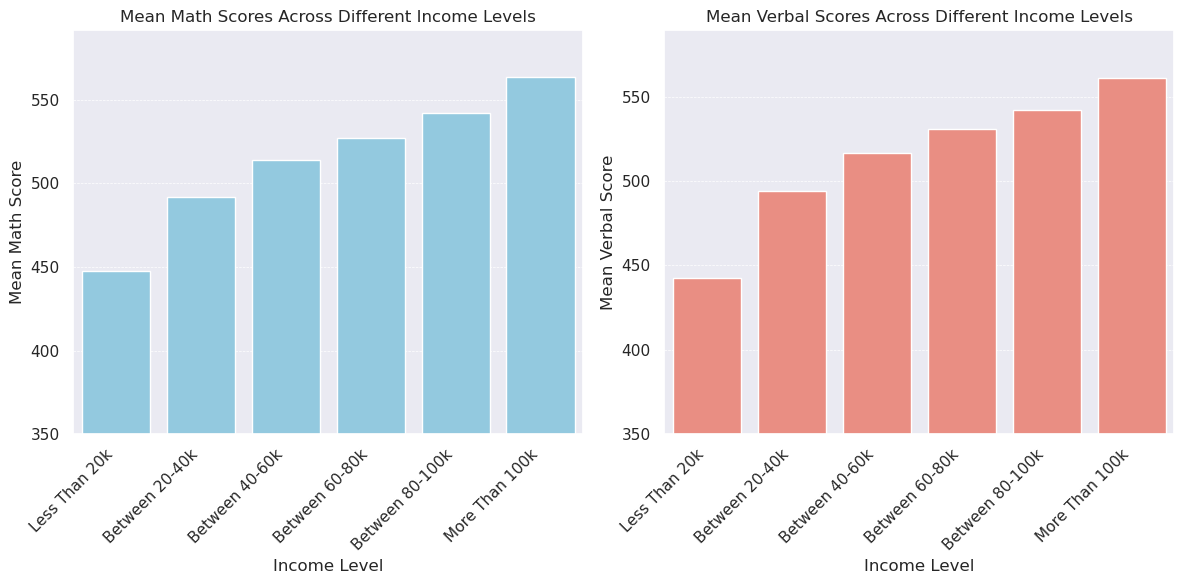

In [17]:
# Specify test score columns
math_score_columns = [
    'FAMILY_INCOME_LESS_THAN_20K_MATH', 
    'FAMILY_INCOME_BETWEEN_20-40K_MATH', 
    'FAMILY_INCOME_BETWEEN_40-60K_MATH', 
    'FAMILY_INCOME_BETWEEN_60-80K_MATH', 
    'FAMILY_INCOME_BETWEEN_80-100K_MATH', 
    'FAMILY_INCOME_MORE_THAN_100K_MATH'
]
verbal_score_columns = [
    'FAMILY_INCOME_LESS_THAN_20K_VERBAL', 
    'FAMILY_INCOME_BETWEEN_20-40K_VERBAL', 
    'FAMILY_INCOME_BETWEEN_40-60K_VERBAL', 
    'FAMILY_INCOME_BETWEEN_60-80K_VERBAL', 
    'FAMILY_INCOME_BETWEEN_80-100K_VERBAL', 
    'FAMILY_INCOME_MORE_THAN_100K_VERBAL'
]

def plot_mean_scores_by_income(school_scores):
    """
    Plots mean math and verbal scores across different income levels.

    Parameters:
        - school_scores : Pandas DataFrame containing school scores data.

    Returns:
        - axes : Tuple of matplotlib Axes.
    """
    

    # Calculate the mean math score for each income level
    mean_math_scores = school_scores[math_score_columns].mean()

    # Calculate the mean verbal score for each income level
    mean_verbal_scores = school_scores[verbal_score_columns].mean()

    # Extract income ranges from column names
    income_order = [
        'Less Than 20k', 
        'Between 20-40k', 
        'Between 40-60k', 
        'Between 60-80k', 
        'Between 80-100k', 
        'More Than 100k'
    ]

    plt.figure(figsize=(12, 6))

    # Plot mean math scores
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(x=income_order, y=mean_math_scores, color='skyblue')
    plt.title('Mean Math Scores Across Different Income Levels')
    plt.xlabel('Income Level')
    plt.ylabel('Mean Math Score')
    plt.ylim(350, None)  # Set lower limit of y-axis to 350
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Plot mean verbal scores
    ax2 = plt.subplot(1, 2, 2)
    sns.barplot(x=income_order, y=mean_verbal_scores, color='salmon')
    plt.title('Mean Verbal Scores Across Different Income Levels')
    plt.xlabel('Income Level')
    plt.ylabel('Mean Verbal Score')
    plt.ylim(350, None)  # Set lower limit of y-axis to 350
    plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Adjust layout and display data
    plt.tight_layout()
    plt.show()
    return ax1, ax2
    
axes = plot_mean_scores_by_income(school_scores)

# TESTS
assert axes[0].get_title() == 'Mean Math Scores Across Different Income Levels', "Title for Mean Math Scores plot does not match expected"
assert axes[1].get_title() == 'Mean Verbal Scores Across Different Income Levels', "Title for Mean Verbal Scores plot does not match expected"
assert axes[0].get_xlabel() == 'Income Level', "X-axis label for Mean Math Scores plot does not match expected"
assert axes[1].get_xlabel() == 'Income Level', "X-axis label for Mean Verbal Scores plot does not match expected"
assert axes[0].get_ylabel() == 'Mean Math Score', "Y-axis label for Mean Math Scores plot does not match expected"
assert axes[1].get_ylabel() == 'Mean Verbal Score', "Y-axis label for Mean Verbal Scores plot does not match expected"

## ANOVA Test

### Why ANOVA?

*ANOVA allows us to observe averages among various groups. In this case, each income level is a category (independent variable), and the test scores are quantitative (dependent variable). ANOVA helps determine if there are statistically significant differences in the means of test scores across different income levels.*

In [18]:
# Extract math and verbal scores for each income level
math_scores = [school_scores[column] for column in math_score_columns]
verbal_scores = [school_scores[column] for column in verbal_score_columns]

# Perform one-way ANOVA for math scores
f_statistic_math, p_value_math = f_oneway(*math_scores)

# Print results for math scores
print("Math Scores:")
print("F-statistic:", f_statistic_math)
print("p-value:", p_value_math)
if p_value_math < 0.05:
    print("Reject the null hypothesis. There is a significant difference in math scores across income levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in math scores across income levels.")

# Perform one-way ANOVA for verbal scores
f_statistic_verbal, p_value_verbal = f_oneway(*verbal_scores)

# Print results for verbal scores
print("\nVerbal Scores:")
print("F-statistic:", f_statistic_verbal)
print("p-value:", p_value_verbal)
if p_value_verbal < 0.05:
    print("Reject the null hypothesis. There is a significant difference in verbal scores across income levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in verbal scores across income levels.")

Math Scores:
F-statistic: 28.115978988696668
p-value: 1.65356924686818e-23
Reject the null hypothesis. There is a significant difference in math scores across income levels.

Verbal Scores:
F-statistic: 31.236887043071228
p-value: 9.277062999375112e-26
Reject the null hypothesis. There is a significant difference in verbal scores across income levels.


### What Does It Mean?

*For both plots we're able to reject the null hypothesis ("There will be no difference amongst the scores across different income levels"). The F-statistic tell us how much variance there is amongst the groups, which in this case there is a significant amount The p-value tell us the likleness of if the results were due to chance or not. By default a p-value is set at 0.05, a number below this tells us there is enough evidence to say the results are statistically significant.*

# RQ 2: What are the Impacts of School Expenditures?
*With this question I'll be observing how various school expenditures impact test scores among different states. I was motivated by the fact that school funding varies dramatically across the United States, and I believe it's an important aspect of the governments budget. To confirm the results I'll be utilizing a Pearson test.*

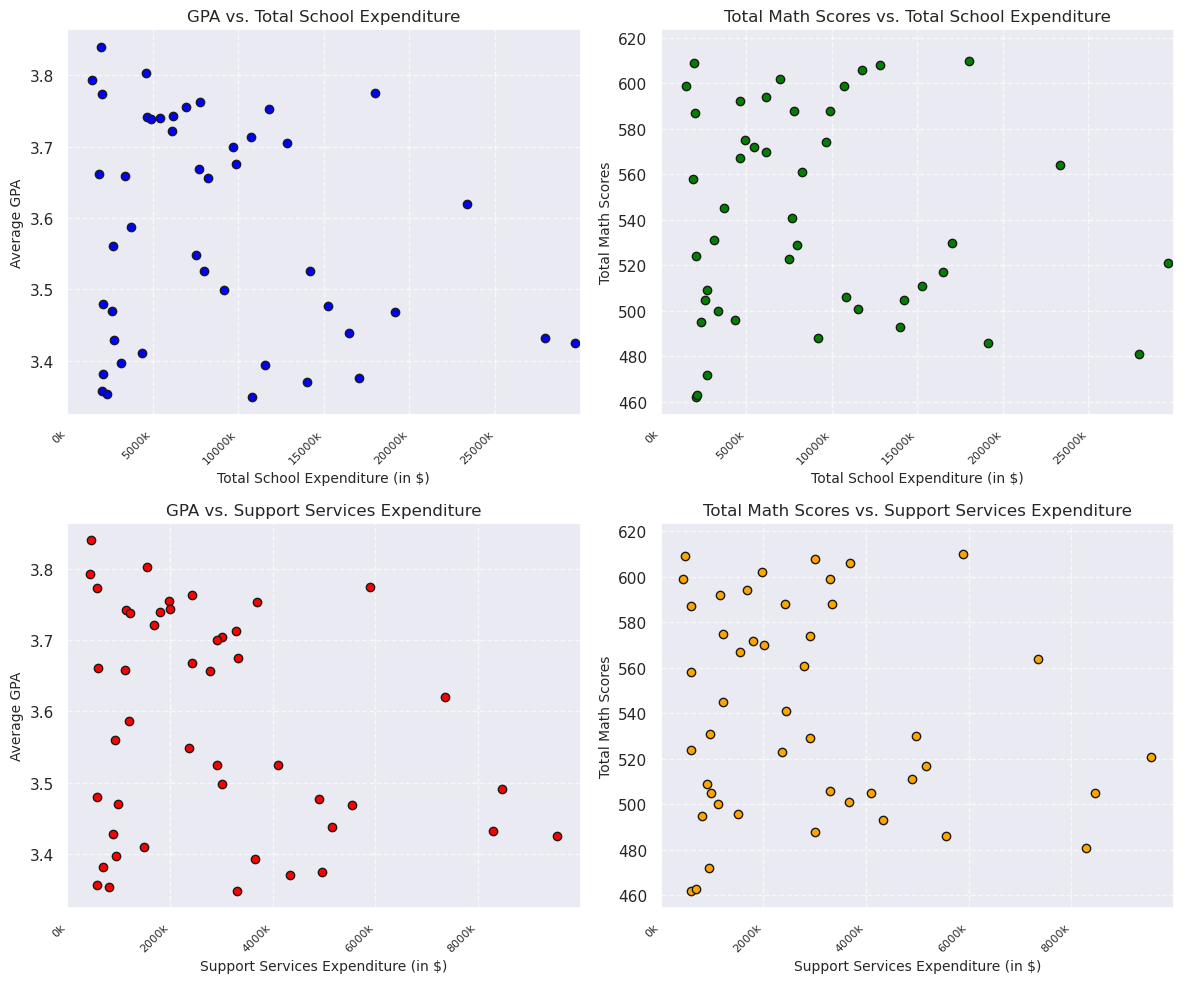

In [11]:
def plot_school_data(school_scores, school_expenditure):
    """
    Plots school data including GPA vs. total school expenditure,
    total math scores vs. total school expenditure,
    GPA vs. support services expenditure,
    and total math scores vs. support services expenditure.

    Parameters:
        - school_scores : Pandas DataFrame containing school scores data.
        - school_expenditure : Pandas DataFrame containing school expenditure data.

    Returns:
        - fig : Matplotlib Figure object.
    """
    
    # Merge the two datasets
    merged_df = school_scores.merge(school_expenditure, left_index=True, right_index=True)

    # Create a figure and subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot for GPA vs. Total School Expenditure
    axs[0, 0].scatter(merged_df['TOTAL_EXPENDITURE'], merged_df['AVERAGE_GPA'], color='blue', edgecolors='k')
    axs[0, 0].set_title('GPA vs. Total School Expenditure', fontsize=12)
    axs[0, 0].set_xlabel('Total School Expenditure (in $)', fontsize=10)
    axs[0, 0].set_ylabel('Average GPA', fontsize=10)
    axs[0, 0].grid(True, linestyle='--', alpha=0.7)
    axs[0, 0].set_xlim(0, 30000000)

    # Plot for Total Math Scores vs. Total School Expenditure
    axs[0, 1].scatter(merged_df['TOTAL_EXPENDITURE'], merged_df['TOTAL_MATH'], color='green', edgecolors='k')
    axs[0, 1].set_title('Total Math Scores vs. Total School Expenditure', fontsize=12)
    axs[0, 1].set_xlabel('Total School Expenditure (in $)', fontsize=10)
    axs[0, 1].set_ylabel('Total Math Scores', fontsize=10)
    axs[0, 1].grid(True, linestyle='--', alpha=0.7)
    axs[0, 1].set_xlim(0, 30000000)

    # Plot for GPA vs. Support Services Expenditure
    axs[1, 0].scatter(merged_df['SUPPORT_SERVICES_EXPENDITURE'], merged_df['AVERAGE_GPA'], color='red', edgecolors='k')
    axs[1, 0].set_title('GPA vs. Support Services Expenditure', fontsize=12)
    axs[1, 0].set_xlabel('Support Services Expenditure (in $)', fontsize=10)
    axs[1, 0].set_ylabel('Average GPA', fontsize=10)
    axs[1, 0].grid(True, linestyle='--', alpha=0.7)
    axs[1, 0].set_xlim(0, 10000000)  

    # Plot for Total Math Scores vs. Support Services Expenditure
    axs[1, 1].scatter(merged_df['SUPPORT_SERVICES_EXPENDITURE'], merged_df['TOTAL_MATH'], color='orange', edgecolors='k')
    axs[1, 1].set_title('Total Math Scores vs. Support Services Expenditure', fontsize=12)
    axs[1, 1].set_xlabel('Support Services Expenditure (in $)', fontsize=10)
    axs[1, 1].set_ylabel('Total Math Scores', fontsize=10)
    axs[1, 1].grid(True, linestyle='--', alpha=0.7)
    axs[1, 1].set_xlim(0, 10000000)  

    # Customize the x-axis tick labels to display values in thousands with a "k" 
    x_ticks = np.arange(0, 30000000, 5000000)
    x_tick_labels = [f'{x/1000:.0f}k' for x in x_ticks]
    for ax in axs.flatten()[:2]:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right', fontsize=8)

    # Adjust x-axis tick labels for the bottom plots
    x_ticks_bottom = np.arange(0, 10000000, 2000000)
    x_tick_labels_bottom = [f'{x/1000:.0f}k' for x in x_ticks_bottom]
    for ax in axs[1]:
        ax.set_xticks(x_ticks_bottom)
        ax.set_xticklabels(x_tick_labels_bottom, rotation=45, ha='right', fontsize=8)

    # Adjust layout and display data
    plt.tight_layout()
    return fig

fig = plot_school_data(school_scores, school_expenditure)

# TESTS
assert fig.get_axes()[0].get_title() == 'GPA vs. Total School Expenditure', "Title for GPA vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[1].get_title() == 'Total Math Scores vs. Total School Expenditure', "Title for Total Math Scores vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[2].get_title() == 'GPA vs. Support Services Expenditure', "Title for GPA vs. Support Services Expenditure plot does not match expected"
assert fig.get_axes()[3].get_title() == 'Total Math Scores vs. Support Services Expenditure', "Title for Total Math Scores vs. Support Services Expenditure plot does not match expected"
assert fig.get_axes()[0].get_xlabel() == 'Total School Expenditure (in $)', "X-axis label for GPA vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[1].get_xlabel() == 'Total School Expenditure (in $)', "X-axis label for Total Math Scores vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[2].get_xlabel() == 'Support Services Expenditure (in $)', "X-axis label for GPA vs. Support Services Expenditure plot does not match expected"
assert fig.get_axes()[3].get_xlabel() == 'Support Services Expenditure (in $)', "X-axis label for Total Math Scores vs. Support Services Expenditure plot does not match expected"
assert fig.get_axes()[0].get_ylabel() == 'Average GPA', "Y-axis label for GPA vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[1].get_ylabel() == 'Total Math Scores', "Y-axis label for Total Math Scores vs. Total School Expenditure plot does not match expected"
assert fig.get_axes()[2].get_ylabel() == 'Average GPA', "Y-axis label for GPA vs. Support Services Expenditure plot does not match expected"
assert fig.get_axes()[3].get_ylabel() == 'Total Math Scores', "Y-axis label for Total Math Scores vs. Support Services Expenditure plot does not match expected"

# RQ 2 EXTENDED: What If We Divide The Total Test Takers for Each State by The Total State Expenditure on Schools?
*Just by looking it's quite obvious there is no sort of correlation, however it is important to consider the population sizes of these different states. I decided to take this into consideration by dividing the number of test takers by the total school expenditure for that state. The data is limited so the expenditure per test-taker is very exaggerated, regardless assuming the sample size is a good reflection of the states total scores, the general trend should remain the same either way.*

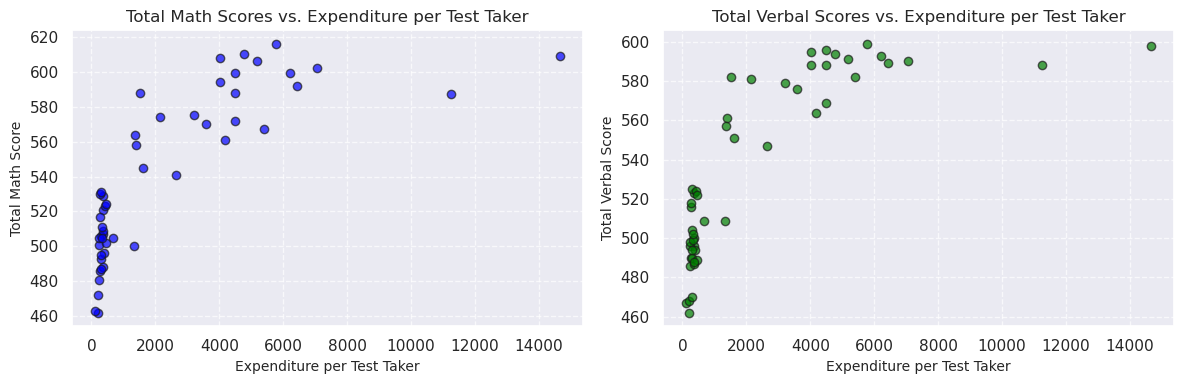

In [12]:
def plot_expenditure_vs_scores(school_scores, school_expenditure):
    """
    Plots total math scores and total verbal scores against expenditure per test taker.

    Parameters:
        - school_scores : Pandas DataFrame containing school scores data.
        - school_expenditure : Pandas DataFrame containing school expenditure data.

    Returns:
        - fig : Matplotlib Figure object.
    """
    # Merge the two datasets
    merged_data = school_expenditure.merge(school_scores[['AVERAGE_GPA', 'TOTAL_MATH', 'TOTAL_TEST-TAKERS', 'TOTAL_VERBAL']], left_index=True, right_index=True)

    # Calculate total expenditure per test taker
    merged_data['EXPENDITURE_PER_TESTTAKER'] = merged_data['TOTAL_EXPENDITURE'] / merged_data['TOTAL_TEST-TAKERS']

    # Create a figure and subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot for Math Scores
    axs[0].scatter(merged_data['EXPENDITURE_PER_TESTTAKER'], merged_data['TOTAL_MATH'], color='blue', edgecolors='k', alpha=0.7)
    axs[0].set_title('Total Math Scores vs. Expenditure per Test Taker', fontsize=12)
    axs[0].set_xlabel('Expenditure per Test Taker', fontsize=10)
    axs[0].set_ylabel('Total Math Score', fontsize=10)
    axs[0].grid(True, linestyle='--', alpha=0.7)

    # Plot for Verbal Scores
    axs[1].scatter(merged_data['EXPENDITURE_PER_TESTTAKER'], merged_data['TOTAL_VERBAL'], color='green', edgecolors='k', alpha=0.7)
    axs[1].set_title('Total Verbal Scores vs. Expenditure per Test Taker', fontsize=12)
    axs[1].set_xlabel('Expenditure per Test Taker', fontsize=10)
    axs[1].set_ylabel('Total Verbal Score', fontsize=10)
    axs[1].grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and display data
    plt.tight_layout()
    return fig

fig = plot_expenditure_vs_scores(school_scores, school_expenditure)

# TESTS
assert fig.get_axes()[0].get_title() == 'Total Math Scores vs. Expenditure per Test Taker', "Title for Total Math Scores vs. Expenditure per Test Taker plot does not match expected"
assert fig.get_axes()[1].get_title() == 'Total Verbal Scores vs. Expenditure per Test Taker', "Title for Total Verbal Scores vs. Expenditure per Test Taker plot does not match expected"
assert fig.get_axes()[0].get_xlabel() == 'Expenditure per Test Taker', "X-axis label for Total Math Scores vs. Expenditure per Test Taker plot does not match expected"
assert fig.get_axes()[1].get_xlabel() == 'Expenditure per Test Taker', "X-axis label for Total Verbal Scores vs. Expenditure per Test Taker plot does not match expected"
assert fig.get_axes()[0].get_ylabel() == 'Total Math Score', "Y-axis label for Total Math Scores vs. Expenditure per Test Taker plot does not match expected"
assert fig.get_axes()[1].get_ylabel() == 'Total Verbal Score', "Y-axis label for Total Verbal Scores vs. Expenditure per Test Taker plot does not match expected"

## Pearson Test

### Why Pearson?

*Pearson tests allow us to observe the strength of a linear relationship, in this case the relationship between expenditure per test taker and total test score. By running the tests we'll be able to determine if the correlationb is significant enough that it isn't due to chance.*

In [19]:
merged_data = school_expenditure.merge(school_scores[['AVERAGE_GPA', 'TOTAL_MATH', 'TOTAL_TEST-TAKERS', 'TOTAL_VERBAL']], left_index=True, right_index=True)
merged_data['EXPENDITURE_PER_TESTTAKER'] = merged_data['TOTAL_EXPENDITURE'] / merged_data['TOTAL_TEST-TAKERS']


# Calculate Pearson's correlation for math scores
corr_math, p_value_math = pearsonr(merged_data['EXPENDITURE_PER_TESTTAKER'], merged_data['TOTAL_MATH'])

# Calculate Pearson's correlation for verbal scores
corr_verbal, p_value_verbal = pearsonr(merged_data['EXPENDITURE_PER_TESTTAKER'], merged_data['TOTAL_VERBAL'])

# Print the results
print("Math Scores vs. Expenditure per Test Taker:")
print("Correlation coefficient:", corr_math)
print("p-value:", p_value_math)
if p_value_math < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between expenditure per test taker and math scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between expenditure per test taker and math scores.")

print("\nVerbal Scores vs. Expenditure per Test Taker:")
print("Correlation coefficient:", corr_verbal)
print("p-value:", p_value_verbal)
if p_value_verbal < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between expenditure per test taker and verbal scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between expenditure per test taker and verbal scores.")

Math Scores vs. Expenditure per Test Taker:
Correlation coefficient: 0.7732185102466524
p-value: 4.67699259737138e-11
Reject the null hypothesis. There is a significant correlation between expenditure per test taker and math scores.

Verbal Scores vs. Expenditure per Test Taker:
Correlation coefficient: 0.773421608769129
p-value: 4.5889655473819256e-11
Reject the null hypothesis. There is a significant correlation between expenditure per test taker and verbal scores.


### What Does It Mean?

*For both scatter plots we're able to reject the null hypothesis ("There will be no correlation among school expenditure per test taker and test scores"). The Correlation coefficient tell us the strength of the relationship, and it ranges from -1 to 1. Closer to 1 means a strong positive linear relationship. Then the p value tell us the statistical significance of these results. As previously noted, a value below 0.05 indicates a strong relationship.*

# RQ 3: Does STEM Employment Impact Student STEM Performance?
*With this question I'll be observing if there's any sort of correlation between female math test scores in a certain state, and the share of women that make up STEM occupations in that state. The idea had been brought up by my sister and I was motivated to see if such enivormental factors could STEM performance.*

<Figure size 1750x2000 with 0 Axes>

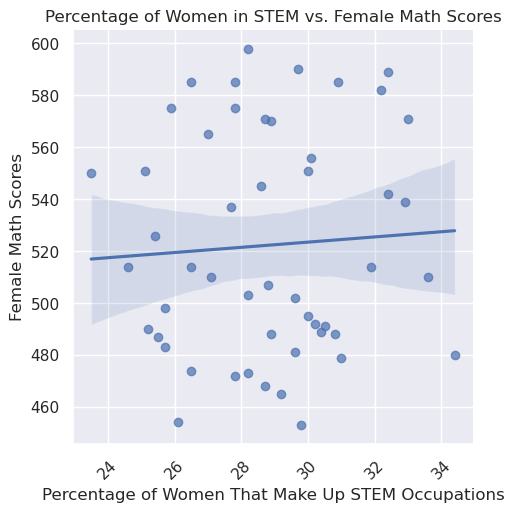

In [20]:
def plot_stem_vs_math(women_stem, school_scores):
    """
    Plots female math scores against the percentage of women that make up STEM occupations in a given state.

    Parameters:
        - women_stem : Pandas DataFrame containing data on the percentage of women in STEM occupations.
        - school_scores : Pandas DataFrame containing school scores data.

    Returns:
        - ax : Axes object containing the plot.
    """
    # Merge the two datasets
    merged_df = women_stem.merge(school_scores, left_index=True, right_index=True, how='inner')
    merged_df_sorted = merged_df.sort_values(by='WOMEN_SHARE_OF_STEM')

    # Create the lmplot with a line of best fit and rotated x-axis tick labels
    plt.figure(figsize=(17.5, 20))
    ax = sns.lmplot(data=merged_df_sorted, x='WOMEN_SHARE_OF_STEM', y='GENDER_FEMALE_MATH', scatter_kws={'alpha':0.7})
    plt.xticks(rotation=45)

    # Set title
    plt.title('Percentage of Women in STEM vs. Female Math Scores')

    # Add labels
    plt.xlabel('Percentage of Women That Make Up STEM Occupations')
    plt.ylabel('Female Math Scores')

    # Display plot
    plt.grid(True)
    plt.show()
    return ax

ax = plot_stem_vs_math(women_stem, school_scores)

# TESTS
assert ax.ax.get_title() == 'Percentage of Women in STEM vs. Female Math Scores', "Title does not match expected"
assert ax.ax.get_xlabel() == 'Percentage of Women That Make Up STEM Occupations', "X-axis label does not match expected"
assert ax.ax.get_ylabel() == 'Female Math Scores', "Y-axis label does not match expected"

## Pearson Test

In [21]:
# Merge the datasets
merged_df = women_stem.merge(school_scores, left_index=True, right_index=True, how='inner')

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(merged_df['WOMEN_SHARE_OF_STEM'], merged_df['GENDER_FEMALE_MATH'])

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant linear relationship between the percentage of women in STEM occupations and female math scores.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between the percentage of women in STEM occupations and female math scores.")

Correlation coefficient: 0.05985337763589421
p-value: 0.6796848723443076
Fail to reject the null hypothesis. There is no significant linear relationship between the percentage of women in STEM occupations and female math scores.


### What Does It Mean?

*By observing the graph you can see according to the line of best fit there is SOME but very little correlation among these 2 variables. The p-value is above 0.05 thus we cannot reject the null hypothesis and the small trend we saw is likely due to chance and there is no such relationship between female math scores and the share of women that make up professional STEM occupations. It is important to note that this isn't to say that such enivornmental factors play no roles. Role models and you're surroundings will always have an impact on you.*

## Implications and Limitations

*The purpose of this research was to provide insight into how we can better support students in the public education system. It is aimed to benefit schools, the students themselves, as well as the government. There are many limitiations however, mainly due to limited data on both test scores and school expenditures. However, assuming that the sample size from these datasets are a good reflection of the real-world, these trends should still stand.*